I will use labels to collect statistics for the entire dataset, and then select five random samples from the image set to visualize the data information

In [ ]:
import os

# First read label
def read_labels_from_folder(folder_path):

    labels = []
    for filename in os.listdir(folder_path):
    
     # Our coursework uses txt text as a label, so we need to test txt.   
        if filename.endswith('.txt'):  
            file_path = os.path.join(folder_path, filename)
            with open(file_path, 'r') as file:
                for line in file:
                    label = line.strip().split()[0]
                    labels.append(label)
    return labels


folder_path = '/Users/fengbowen/Desktop/pythonProject/git_dts101/resources/demo_2000/labels/train' 
labels = read_labels_from_folder(folder_path)
print(labels)

['5', '5', '5', '5', '1', '5', '5', '5', '5', '7', '6', '6', '6', '6', '8', '8', '8', '4', '2', '0', '0', '8', '1', '2', '4', '5', '5', '5', '5', '5', '5', '5', '5', '5', '5', '5', '5', '5', '5', '2', '2', '2', '2', '5', '2', '2', '4', '4', '4', '5', '5', '5', '5', '5', '5', '5', '5', '5', '6', '6', '6', '0', '5', '5', '5', '8', '8', '4', '4', '7', '7', '2', '2', '2', '2', '2', '2', '2', '2', '2', '2', '3', '3', '3', '3', '3', '6', '6', '6', '6', '6', '6', '2', '2', '2', '5', '5', '5', '5', '6', '6', '9', '1', '6', '5', '5', '5', '5', '5', '5', '1', '0', '0', '0', '6', '6', '6', '2', '6', '4', '4', '5', '5', '1', '1', '2', '1', '4', '4', '4', '4', '4', '4', '4', '4', '4', '4', '2', '4', '4', '4', '4', '4', '4', '4', '4', '4', '4', '4', '4', '4', '4', '5', '5', '5', '5', '5', '5', '7', '9', '5', '7', '7', '8', '8', '8', '2', '0', '6', '3', '3', '8', '8', '8', '8', '8', '8', '8', '8', '8', '1', '4', '1', '2', '2', '2', '2', '2', '2', '3', '3', '2', '2', '4', '4', '4', '4', '4', '4', '4',

In [ ]:
def convert_labels(labels, label_mapping):
    converted_labels = []
    for label in labels:
        converted_label = label_mapping.get(label, label)  
        converted_labels.append(converted_label)
    return converted_labels


# Make a label conversion list
label_mapping = {
  '0': 'person',
  '1': 'cat',
  '2': 'dog',
  '3': 'bottle',
  '4': 'banana',
  '5': 'orange',
  '6': 'chair',
  '7': 'laptop',
  '8': 'book',
  '9': 'apple'
}

converted_labels = convert_labels(labels, label_mapping)
for label in converted_labels:
    print(label)

orange
orange
orange
orange
cat
orange
orange
orange
orange
laptop
chair
chair
chair
chair
book
book
book
banana
dog
person
person
book
cat
dog
banana
orange
orange
orange
orange
orange
orange
orange
orange
orange
orange
orange
orange
orange
orange
dog
dog
dog
dog
orange
dog
dog
banana
banana
banana
orange
orange
orange
orange
orange
orange
orange
orange
orange
chair
chair
chair
person
orange
orange
orange
book
book
banana
banana
laptop
laptop
dog
dog
dog
dog
dog
dog
dog
dog
dog
dog
bottle
bottle
bottle
bottle
bottle
chair
chair
chair
chair
chair
chair
dog
dog
dog
orange
orange
orange
orange
chair
chair
apple
cat
chair
orange
orange
orange
orange
orange
orange
cat
person
person
person
chair
chair
chair
dog
chair
banana
banana
orange
orange
cat
cat
dog
cat
banana
banana
banana
banana
banana
banana
banana
banana
banana
banana
dog
banana
banana
banana
banana
banana
banana
banana
banana
banana
banana
banana
banana
banana
banana
orange
orange
orange
orange
orange
orange
laptop
apple
orange


The final statistical information will be displayed below

In [ ]:
# Display the final statistics
def count_labels(labels):
    label_count = {}
    for label in labels:
        if label in label_count:
            label_count[label] += 1
        else:
            label_count[label] = 1
    return label_count

label_count = count_labels(converted_labels)

# abel_count = count_labels(labels)
print("Statistical results:")
for label, count in label_count.items():
    print(f" {label}: {count} ")

Statistical results:
 orange: 800 
 cat: 225 
 laptop: 258 
 chair: 609 
 book: 980 
 banana: 675 
 dog: 285 
 person: 724 
 bottle: 590 
 apple: 52 


Next are five random photos and corresponding labels in the training machine

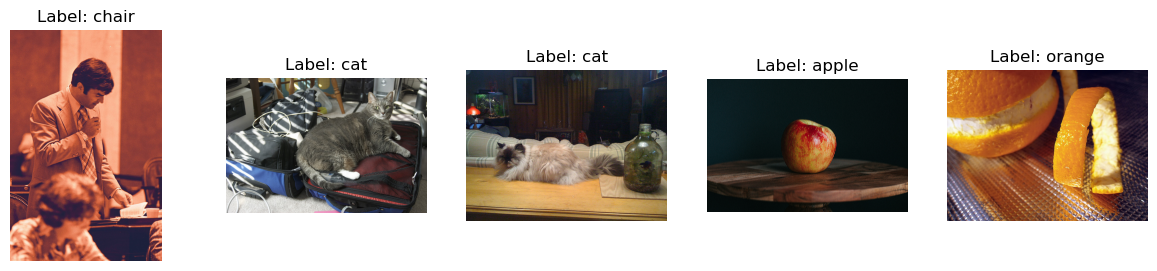

In [ ]:
import os
import random
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

def read_labels_from_folder(folder_path):

    labels = []
    for filename in os.listdir(folder_path):
        # Our coursework uses txt text as a label, so we need to test txt
        if filename.endswith('.txt'):
            file_path = os.path.join(folder_path, filename)
            with open(file_path, 'r') as file:
                for line in file:
                    
                    # Because each row of data is separated by Spaces, the first column is the label
                    label = line.strip().split()[0]
                    labels.append(label)
    return labels

def plot_images_with_labels(image_folder_path, label_folder_path, label_mapping, num_images=5):

    # All image files in folder
    images = [f for f in os.listdir(image_folder_path) if f.endswith(('.png', '.jpg', '.jpeg'))]
    
    # Mix it up
    random.shuffle(images)  

    selected_images = images[:num_images]

    fig, axes = plt.subplots(1, num_images, figsize=(15, 3))
    for i, img_file in enumerate(selected_images):
        img_path = os.path.join(image_folder_path, img_file)
        img = mpimg.imread(img_path)
        
        
        # Gets the tag file name of the image
        label_file = img_file.replace('.png', '.txt').replace('.jpg', '.txt').replace('.jpeg', '.txt')
        label_file_path = os.path.join(label_folder_path, label_file)
        
        with open(label_file_path, 'r') as file:
            for line in file:
                label = line.strip().split()[0]
                converted_label = label_mapping.get(label, label) 

        ax = axes[i]
        ax.imshow(img)
        ax.set_title(f'Label: {converted_label}')
        ax.axis('off') 
    plt.show()

image_folder_path = '/Users/fengbowen/Desktop/pythonProject/git_dts101/resources/demo_2000/images/train'  
label_folder_path = '/Users/fengbowen/Desktop/pythonProject/git_dts101/resources/demo_2000/labels/train'  
label_mapping = {
  '0': 'person',
  '1': 'cat',
  '2': 'dog',
  '3': 'bottle',
  '4': 'banana',
  '5': 'orange',
  '6': 'chair',
  '7': 'laptop',
  '8': 'book',
  '9': 'apple'

}

plot_images_with_labels(image_folder_path, label_folder_path, label_mapping)

I have already used the py file to run on my own computer and server. Here, I only add comments in the notebook to facilitate visualization. Due to the problem of computer computing power, I will not repeat the run

In [ ]:
from ultralytics import YOLO
import os

if __name__ == '__main__':
    # Load a COCO-pretrained YOLO11n model, or define a new mdoel
# This step is to load the model
    model = YOLO("/Users/fengbowen/Desktop/pythonProject/resources/cfg/models/yolo11_model_10class.yaml").load("best.pt")

# The following line is for using the file directory in the server
# model = YOLO("/root/autodl-tmp/cw101/resources/cfg/models/yolo11_model_10class.yaml").load("best.pt")


    # Train the model on the COCO8 example dataset for 100 epochs

    # This step is to load the data, and the actual training set path is stored in the yaml file
    results = model.train(data="/Users/fengbowen/Desktop/pythonProject/resources/cfg/datasets/yolo11_10class.yaml", 
                        epochs=3, imgsz=640)

# The following line is for using the file directory in the server,I completed 100 epoch tasks in the server.
# results = model.train(data="/root/autodl-tmp/cw101/resources/cfg/datasets/yolo11_10class.yaml", epochs=100, imgsz=640)

In [ ]:
from ultralytics import YOLO

# Load a pretrained YOLO11n model
model = YOLO("/Users/fengbowen/Desktop/pythonProject/runs/detect/train3/weights/best.pt")

# Run inference on 'bus.jpg' with arguments
model.predict("/Users/fengbowen/Desktop/pythonProject/resources/images_test", save=True, imgsz=640, conf=0.1)

# test and train code structure is similar, I won't go into details, 
# the main difference is that here directly loaded the test set file path